# VERKKO BATCH 123 Complete and Accurate Active alpha satellite HOR arrays non-B Annotations
All the analyses below pertain to the annotation of the complete and accurate Active alpha satellite HOR arrays provided by Glennis Logsdon 


Grouped data (Haplotype, Sample, Chromosome) with total lengths:
            Haplotype   Sample Chromosome   Length
0  haplotype1-0000001  HG00358      chr14  2609977
1  haplotype1-0000001  HG01890      chr19  3248127
2  haplotype1-0000001  HG02011       chr9  2949385
3  haplotype1-0000001  HG03009      chr17  3645626
4  haplotype1-0000001  HG03371      chr11  5794405

Total number of unique centromeres per chromosome (after combining lengths):
   Chromosome  Total Centromeres
0        chr1                 32
11       chr2                 44
15       chr3                 18
16       chr4                 31
17       chr5                 25
18       chr6                 39
19       chr7                 28
20       chr8                 45
21       chr9                 39
1       chr10                 48
2       chr11                 29
3       chr12                 39
4       chr13                 29
5       chr14                 58
6       chr15                 52
7       chr16         

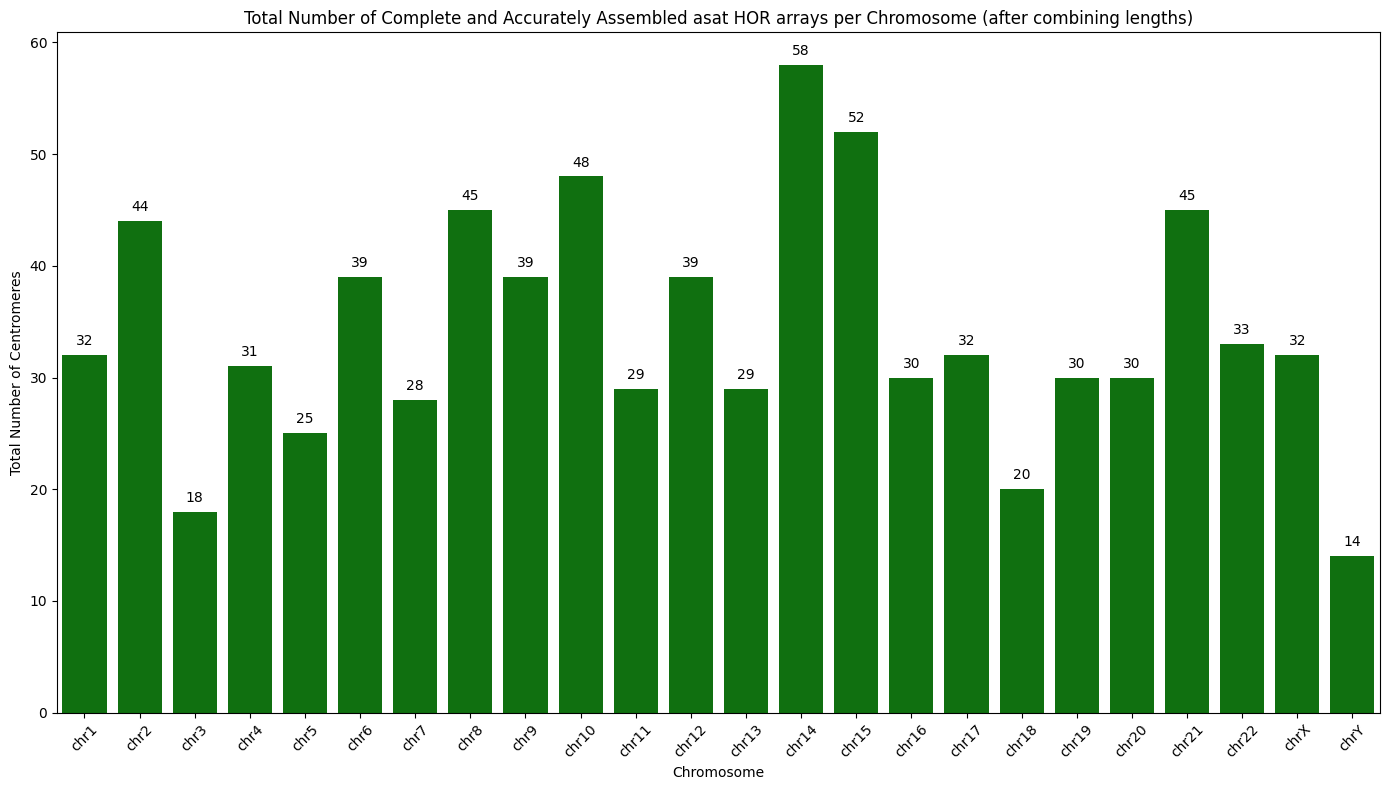

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the BED file into a DataFrame
bed_file = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/hgsvc3_verkko_v1.4_nonredundant_complete_and_accurate_active_asat_HOR_arrays_v3.bed"
columns = ['Haplotype', 'Start', 'End', 'Sample', 'Chromosome']
df = pd.read_csv(bed_file, sep='\t', header=None, names=columns)

# Calculate the length of each entry (difference between Start and End)
df['Length'] = df['End'] - df['Start']

# Group by Haplotype, Sample, and Chromosome to sum up lengths
grouped_df = df.groupby(['Haplotype', 'Sample', 'Chromosome']).agg({'Length': 'sum'}).reset_index()

# Print out details of the grouped data
print("\nGrouped data (Haplotype, Sample, Chromosome) with total lengths:")
print(grouped_df.head())  # Show the first few rows

# Now count the total number of unique centromeres per chromosome (after combining lengths)
centromere_counts = grouped_df.groupby('Chromosome').size().reset_index(name='Total Centromeres')

# Define the order of chromosomes for plotting
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
centromere_counts['Chromosome'] = pd.Categorical(centromere_counts['Chromosome'], categories=chromosome_order, ordered=True)

# Sort the DataFrame by chromosome order
centromere_counts = centromere_counts.sort_values('Chromosome')

# Print the total number of centromeres per chromosome after combining lengths
print("\nTotal number of unique centromeres per chromosome (after combining lengths):")
print(centromere_counts)

# Calculate and print the total number of centromeres across all chromosomes
total_centromeres = centromere_counts['Total Centromeres'].sum()
print(f"\nTotal number of unique centromeres across all chromosomes (after combining lengths): {total_centromeres}")

# Plotting the total number of centromeres per chromosome
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=centromere_counts, x='Chromosome', y='Total Centromeres', color='green')

# Adding the counts on top of the bars, slightly above each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10), textcoords='offset points')

plt.title('Total Number of Complete and Accurately Assembled asat HOR arrays per Chromosome (after combining lengths)')
plt.xlabel('Chromosome')
plt.ylabel('Total Number of Centromeres')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

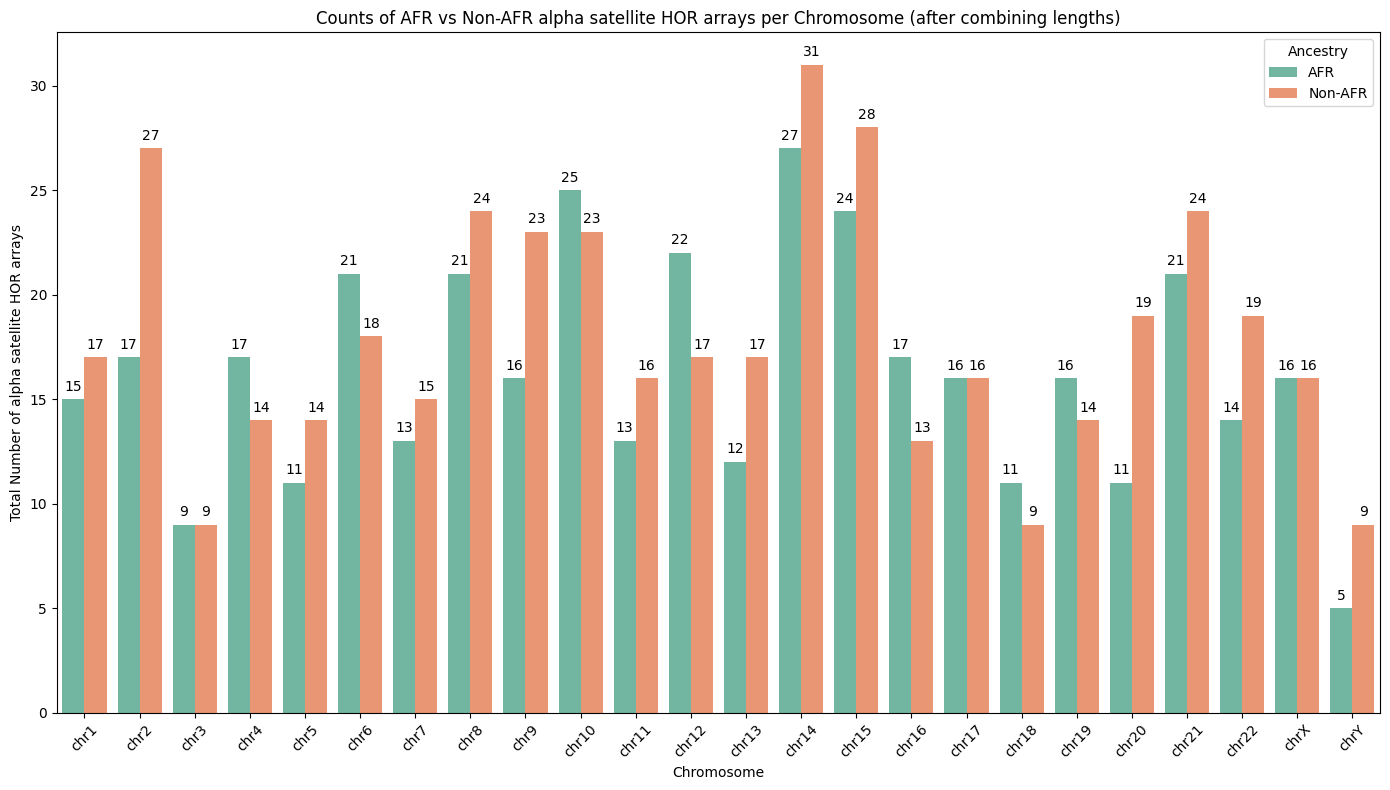

Total number of active alpha satellite arrays across all chromosomes (after combining lengths): 822


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the BED file into a DataFrame
bed_file = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/hgsvc3_verkko_v1.4_nonredundant_complete_and_accurate_active_asat_HOR_arrays_v3.bed"
columns = ['Haplotype', 'Start', 'End', 'Sample', 'Chromosome']
df = pd.read_csv(bed_file, sep='\t', header=None, names=columns)

# Load metadata
metadata_path = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/igsr_samples.tsv"
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Merge metadata with the BED file data
df = pd.merge(df, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Categorize into African Ancestry vs Non-African Ancestry
df['Ancestry'] = df['Superpopulation name'].apply(lambda x: 'AFR' if x == 'African Ancestry' else 'Non-AFR')

# Calculate the length of each region (difference between Start and End)
df['Length'] = df['End'] - df['Start']

# Group by Haplotype, Sample, Chromosome, and Ancestry to sum up lengths
grouped_df = df.groupby(['Haplotype', 'Sample', 'Chromosome', 'Ancestry']).agg({'Length': 'sum'}).reset_index()

# Group the data by Chromosome and Ancestry to count the total centromeres after summing lengths
centromere_counts = grouped_df.groupby(['Chromosome', 'Ancestry']).size().reset_index(name='Total Centromeres')

# Calculate total number of centromeres across all chromosomes
total_centromeres = centromere_counts['Total Centromeres'].sum()

# Convert the order of chromosomes to categorical for proper ordering
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
centromere_counts['Chromosome'] = pd.Categorical(centromere_counts['Chromosome'], categories=chromosome_order, ordered=True)

# Plotting the grouped bar plot for AFR vs Non-AFR centromere counts by chromosome
plt.figure(figsize=(14, 8))
sns.barplot(x='Chromosome', y='Total Centromeres', hue='Ancestry', data=centromere_counts, palette='Set2')

# Add labels above the bars, but only for non-zero counts
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           xytext=(0, 9), textcoords='offset points')

plt.title('Counts of AFR vs Non-AFR alpha satellite HOR arrays per Chromosome (after combining lengths)')
plt.xlabel('Chromosome')
plt.ylabel('Total Number of alpha satellite HOR arrays')
plt.xticks(rotation=45)
plt.legend(title='Ancestry')
plt.tight_layout()

# Show the plot
plt.show()

# Print the total number of centromeres across all chromosomes
print(f"Total number of active alpha satellite arrays across all chromosomes (after combining lengths): {total_centromeres}")

# Optionally, save the results for future analysis
#centromere_counts.to_csv('/path/to/output/afr_non_afr_centromeres_counts.csv', index=False)

              Haplotype   Sample Chromosome Ancestry   Length  \
11   haplotype1-0000001  NA24385      chr22  Non-AFR  2528302   
40   haplotype1-0000004  NA24385      chr18  Non-AFR  3546972   
91   haplotype1-0000009  NA24385      chr10  Non-AFR  2255771   
106  haplotype1-0000010  NA24385       chr2  Non-AFR  1884860   
136  haplotype1-0000013  NA24385      chr20  Non-AFR  2313650   
162  haplotype1-0000015  NA24385       chr3  Non-AFR  2022962   
169  haplotype1-0000016  NA24385       chr9  Non-AFR  2208344   
249  haplotype1-0000023  NA24385      chr13  Non-AFR  1356792   
276  haplotype1-0000025  NA24385      chr19  Non-AFR  3459158   
300  haplotype1-0000027  NA24385      chr15  Non-AFR  1137769   
463  haplotype2-0000068  NA24385      chr18  Non-AFR  5246966   
483  haplotype2-0000072  NA24385      chr19  Non-AFR  4084805   
496  haplotype2-0000074  NA24385       chr7  Non-AFR  3457799   
500  haplotype2-0000075  NA24385      chr20  Non-AFR  2836229   
516  haplotype2-0000078  

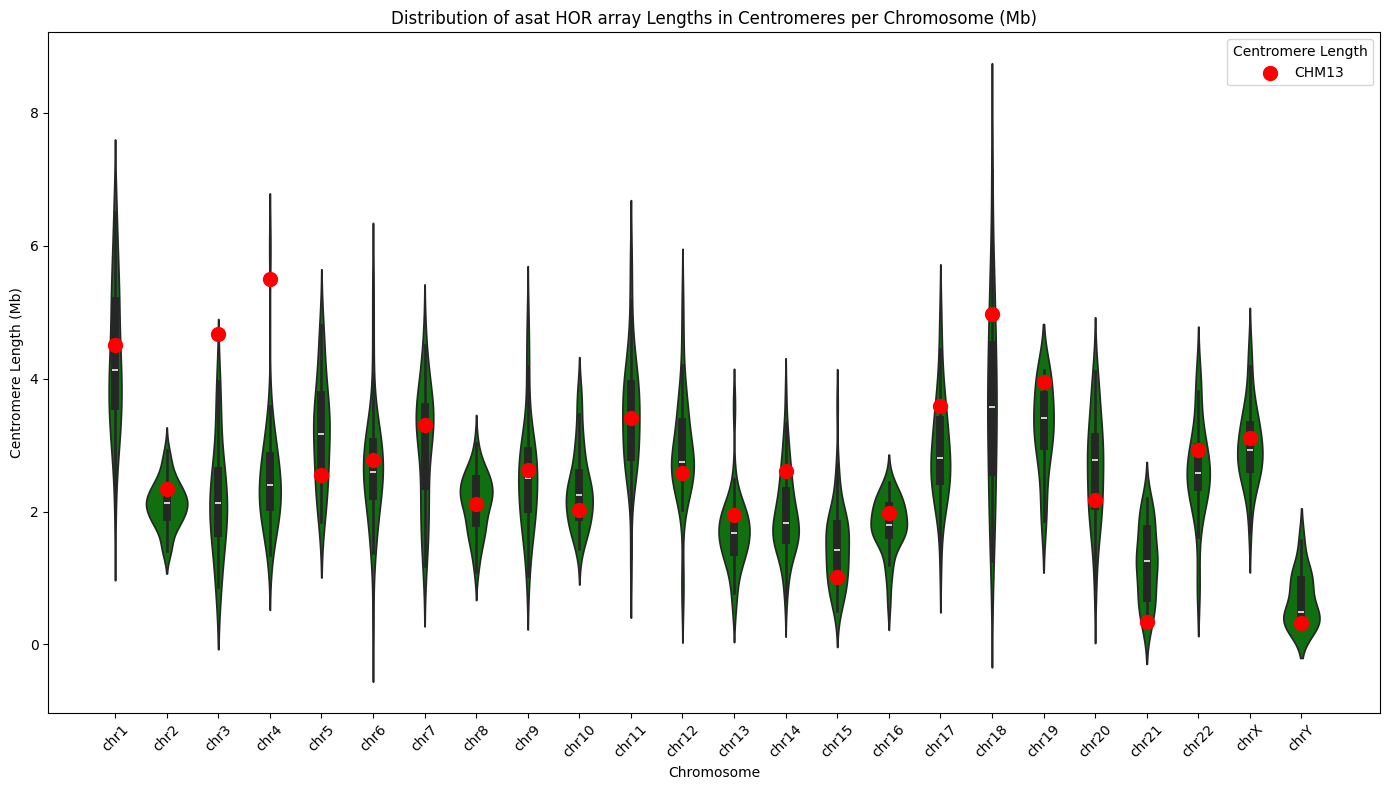

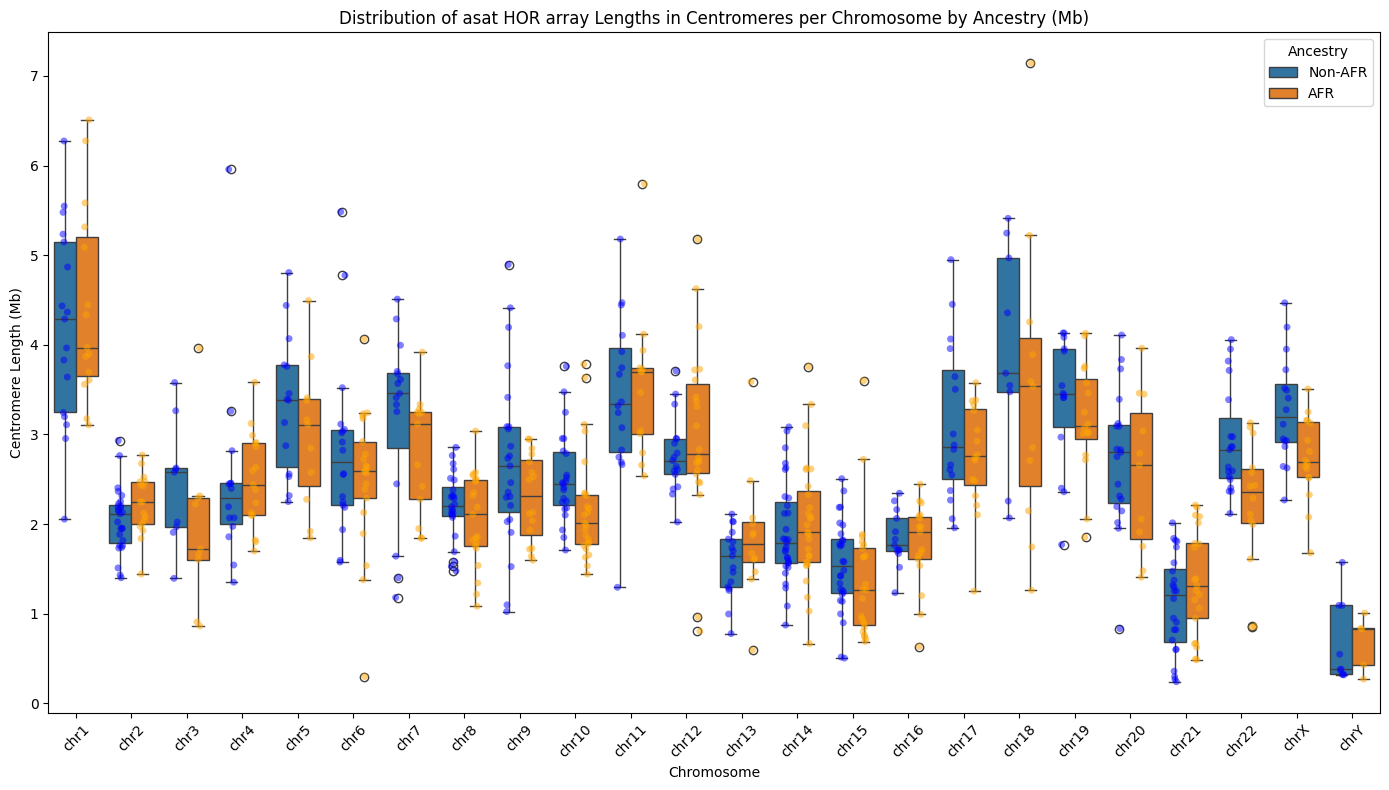

Total number of unique centromeres (after combining lengths): 822

Number of centromeres by ancestry:
Ancestry
Non-AFR    432
AFR        390
Name: count, dtype: int64

Summary statistics for centromere lengths (after combining lengths):
   Chromosome      mean    median         sum  count
0        chr1  4.314990  4.128981  138.079667     32
1        chr2  2.114388  2.127468   93.033087     44
2        chr3  2.195131  2.122788   39.512366     18
3        chr4  2.489382  2.398282   77.170852     31
4        chr5  3.185779  3.164940   79.644482     25
5        chr6  2.658346  2.595849  103.675513     39
6        chr7  2.995607  3.252557   83.876995     28
7        chr8  2.132245  2.188455   95.951026     45
8        chr9  2.536757  2.498123   98.933526     39
9       chr10  2.350062  2.248918  112.802989     48
10      chr11  3.483037  3.467616  101.008078     29
11      chr12  2.903515  2.740298  113.237083     39
12      chr13  1.690607  1.675682   49.027610     29
13      chr14  1.9606

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the BED file into a DataFrame
bed_file = "/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/hgsvc3_verkko_v1.4_nonredundant_complete_and_accurate_active_asat_HOR_arrays_v3.bed"
columns = ['Haplotype', 'Start', 'End', 'Sample', 'Chromosome']
df = pd.read_csv(bed_file, sep='\t', header=None, names=columns)

# Load the metadata to categorize samples into AFR vs Non-AFR
metadata_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/igsr_samples.tsv'
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Merge metadata with the BED file data
df = pd.merge(df, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Categorize into African vs Non-African
df['Ancestry'] = df['Superpopulation name'].apply(lambda x: 'AFR' if x == 'African Ancestry' else 'Non-AFR')

# Calculate the length of each array in base pairs
df['Length'] = df['End'] - df['Start']

# Group by Haplotype, Sample, and Chromosome to sum the lengths for matching entries
grouped_df = df.groupby(['Haplotype', 'Sample', 'Chromosome', 'Ancestry']).agg({'Length': 'sum'}).reset_index()

# Convert lengths to Mb
grouped_df['Centromere_Length'] = grouped_df['Length'] / 1e6  # Convert to megabases (Mb)

# Filter the DataFrame where 'Sample' equals 'NA24385'
filtered_df = grouped_df[grouped_df['Sample'] == 'NA24385']

# Print the filtered DataFrame
print(filtered_df)

grouped_df.to_csv("/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/collapsed_asat_arrays.csv")

# Define the order of chromosomes for plotting
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
grouped_df['Chromosome'] = pd.Categorical(grouped_df['Chromosome'], categories=chromosome_order, ordered=True)

# CHM13 centromere lengths
centromere_lengths = {
    'chr1': 4.504439,
    'chr2': 2.33948,
    'chr3': 4.677024,
    'chr4': 5.494641,
    'chr5': 2.557491,
    'chr6': 2.771684,
    'chr7': 3.300127,
    'chr8': 2.109248,
    'chr9': 2.63082,
    'chr10': 2.030796,
    'chr11': 3.415049,
    'chr12': 2.581652,
    'chr13': 1.950698,
    'chr14': 2.616299,
    'chr15': 1.015672,
    'chr16': 1.981235,
    'chr17': 3.59452,
    'chr18': 4.967851,
    'chr19': 3.950495,
    'chr20': 2.173803,
    'chr21': 0.343352,
    'chr22': 2.922885,
    'chrX': 3.106918,
    'chrY': 0.317335
}

# Plotting the distribution of centromere lengths per chromosome in Mb using a boxplot
plt.figure(figsize=(14, 8))
sns.violinplot(data=grouped_df, x='Chromosome', y='Centromere_Length', color='green')

# Add CHM13 lengths as red dots
for chrom, length in centromere_lengths.items():
    plt.scatter(chrom, length, color='red', s=100, zorder=10, label='CHM13' if chrom == 'chr1' else "")

plt.title('Distribution of asat HOR array Lengths in Centromeres per Chromosome (Mb)')
plt.xlabel('Chromosome')
plt.ylabel('Centromere Length (Mb)')
plt.xticks(rotation=45)
plt.legend(title='Centromere Length')
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the distribution of centromere lengths across all chromosomes with AFR vs Non-AFR comparison
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped_df, x='Chromosome', y='Centromere_Length', hue='Ancestry', order=chromosome_order)
sns.stripplot(data=grouped_df, x='Chromosome', y='Centromere_Length', hue='Ancestry', order=chromosome_order, dodge=True, palette=['blue', 'orange'], alpha=0.5, jitter=True, legend=False, zorder=5)
plt.title('Distribution of asat HOR array Lengths in Centromeres per Chromosome by Ancestry (Mb)')
plt.xlabel('Chromosome')
plt.ylabel('Centromere Length (Mb)')
plt.xticks(rotation=45)
plt.legend(title='Ancestry')
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the total number of centromeres (after combining lengths)
total_centromeres = grouped_df.shape[0]
print(f"Total number of unique centromeres (after combining lengths): {total_centromeres}")

# Calculate and print the number of centromeres by ancestry
centromere_counts_by_ancestry = grouped_df['Ancestry'].value_counts()
print("\nNumber of centromeres by ancestry:")
print(centromere_counts_by_ancestry)

# Print summary statistics for centromere lengths
centromere_length_summary = grouped_df.groupby('Chromosome', observed=True)['Centromere_Length'].agg(['mean', 'median', 'sum', 'count']).reset_index()
print("\nSummary statistics for centromere lengths (after combining lengths):")
print(centromere_length_summary)

# Print Sample names for AFR and Non-AFR
afr_samples = grouped_df[grouped_df['Ancestry'] == 'AFR']['Sample'].unique()
non_afr_samples = grouped_df[grouped_df['Ancestry'] == 'Non-AFR']['Sample'].unique()

print("\nAFR Samples:")
print(afr_samples)

print("\nNon-AFR Samples:")
print(non_afr_samples)

Number of points assigned to each box (Total Count):
Chromosome: chr2, Count: 6 points
Chromosome: chr4, Count: 13 points
Chromosome: chr6, Count: 34 points
Chromosome: chr8, Count: 3 points
Chromosome: chr9, Count: 1 points
Chromosome: chr10, Count: 6 points
Chromosome: chr12, Count: 12 points
Chromosome: chr16, Count: 22 points
Chromosome: chr17, Count: 24 points
Chromosome: chr19, Count: 1 points
Chromosome: chr20, Count: 15 points
Chromosome: chr22, Count: 2 points
Chromosome: chrX, Count: 2 points


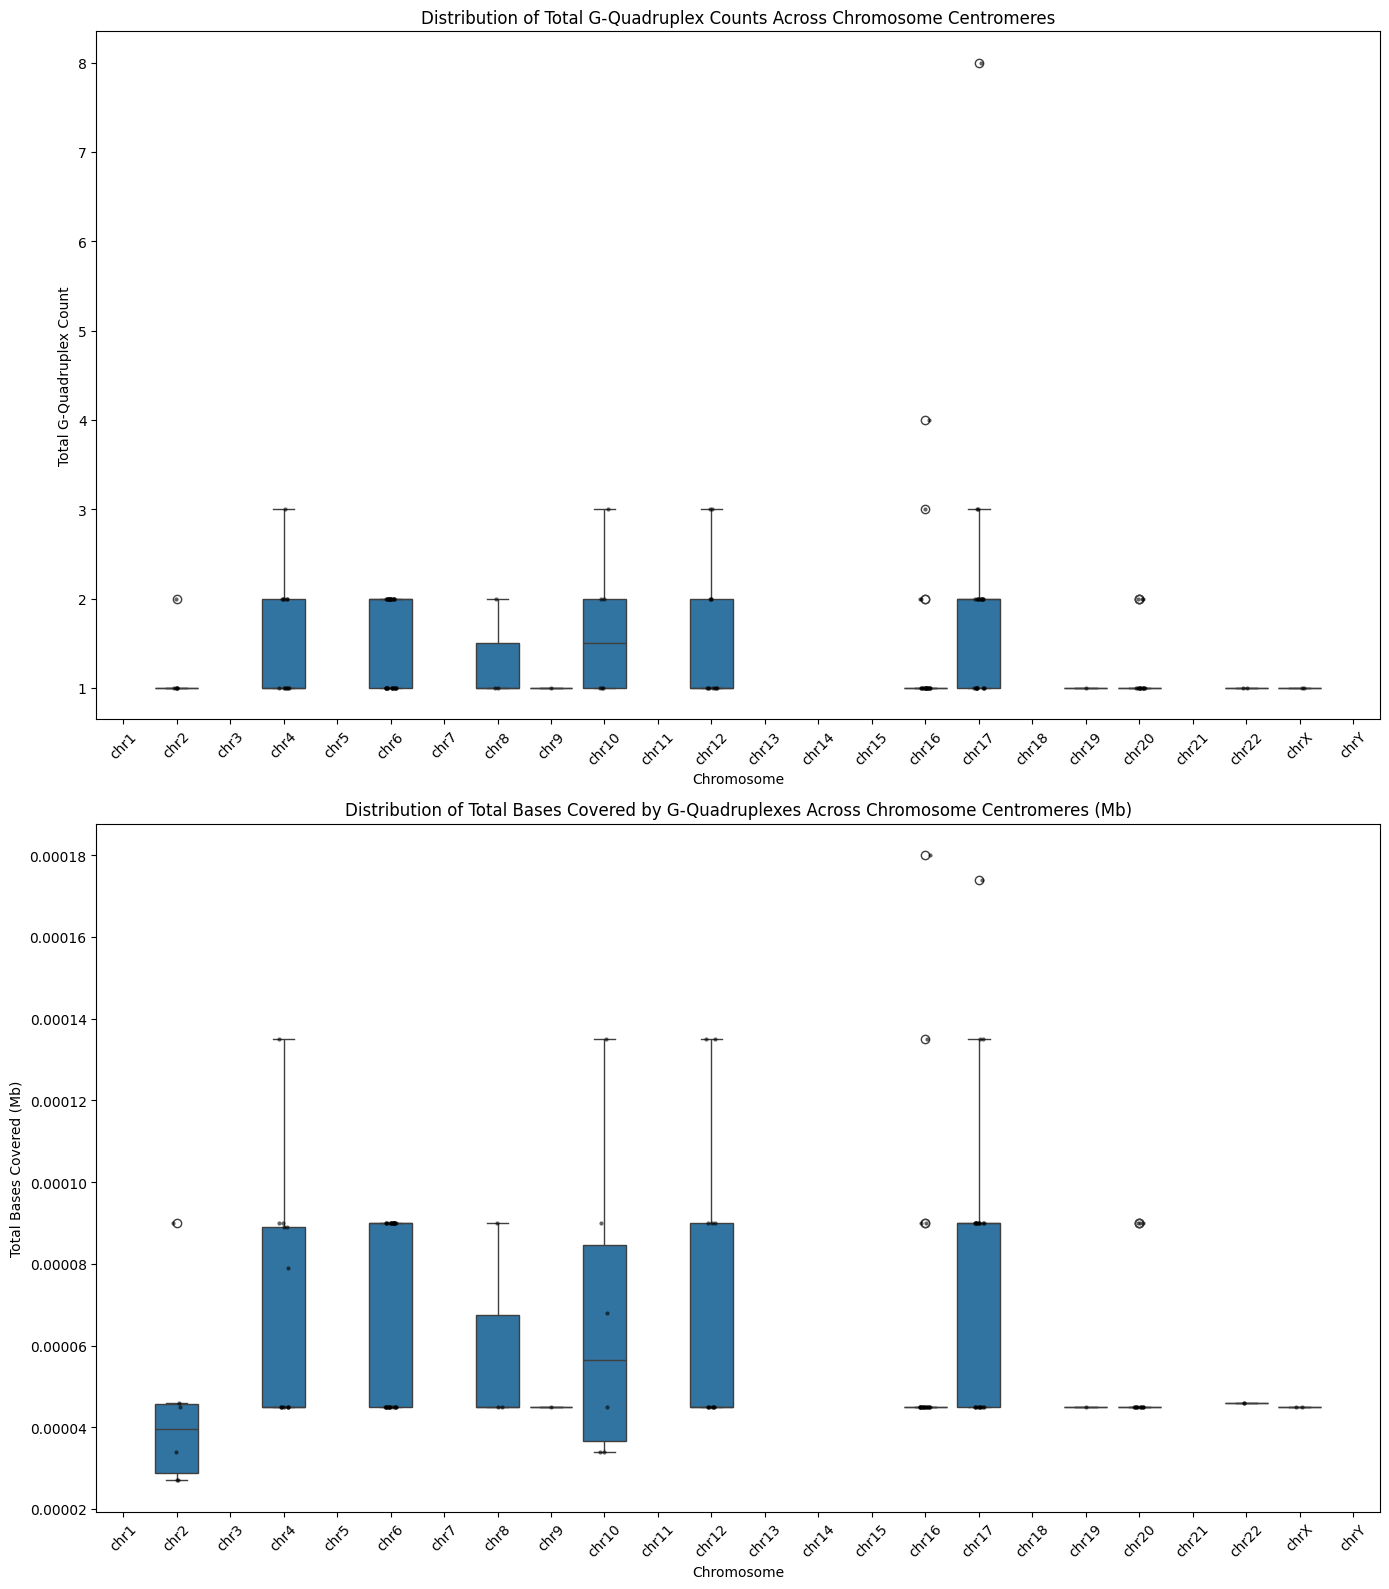

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Hypothetical file paths (assuming they are stored in the same directory)
nonb_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/verkko123_collapsed_summary_metrics_centromere_chr*.csv'))
quadron_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/verkko123_quadron_collapsed_summary_metrics_centromeres_chr*.csv'))

# Initialize empty lists to hold data
nonb_data = []
quadron_data = []

# Load data from non-B motif files
for file in nonb_files:
    df = pd.read_csv(file)
    nonb_data.append(df)

# Load data from Quadron files and extract chromosome information from the file names
for file in quadron_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    quadron_data.append(df)

# Concatenate data into a single DataFrame for each type
nonb_df = pd.concat(nonb_data, ignore_index=True)
quadron_df = pd.concat(quadron_data, ignore_index=True)

# Combine Positive and Negative G-Quadruplex counts and total bases covered for each sample
g_quad_df = quadron_df[quadron_df['Motif Type'].isin(['Positive_G_Quad', 'Negative_G_Quad'])]
g_quad_df = g_quad_df.groupby(['Sample_Haplotype', 'Chromosome']).agg({
    'Total Count': 'sum',
    'Total Base Coverage': 'sum'
}).reset_index()

# Convert Total Base Coverage from base pairs to megabases (Mb)
g_quad_df['Total Base Coverage'] = g_quad_df['Total Base Coverage'] / 1e6

# Define the order of chromosomes
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']

# Convert Chromosome column to a categorical type with a specific order
g_quad_df['Chromosome'] = pd.Categorical(g_quad_df['Chromosome'], categories=chromosome_order, ordered=True)

# Print the number of points assigned to each box
print("Number of points assigned to each box (Total Count):")
for chrom in chromosome_order:
    count = g_quad_df[g_quad_df['Chromosome'] == chrom]['Sample_Haplotype'].nunique()
    if count > 0:
        print(f"Chromosome: {chrom}, Count: {count} points")

# Plotting the combined G-Quadruplex counts
plt.figure(figsize=(14, 16))

plt.subplot(2, 1, 1)
sns.boxplot(data=g_quad_df, x='Chromosome', y='Total Count', order=chromosome_order)
sns.stripplot(data=g_quad_df, x='Chromosome', y='Total Count', dodge=True, order=chromosome_order, size=3, alpha=0.6, color='black', legend=False)
plt.title('Distribution of Total G-Quadruplex Counts Across Chromosome Centromeres')
plt.xlabel('Chromosome')
plt.ylabel('Total G-Quadruplex Count')
plt.xticks(rotation=45)

# Plotting the total bases covered by G-Quadruplexes in Mb
plt.subplot(2, 1, 2)
sns.boxplot(data=g_quad_df, x='Chromosome', y='Total Base Coverage', order=chromosome_order)
sns.stripplot(data=g_quad_df, x='Chromosome', y='Total Base Coverage', dodge=True, order=chromosome_order, size=3, alpha=0.6, color='black', legend=False)
plt.title('Distribution of Total Bases Covered by G-Quadruplexes Across Chromosome Centromeres (Mb)')
plt.xlabel('Chromosome')
plt.ylabel('Total Bases Covered (Mb)')
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plots
plt.show()

Number of unique samples before merging: 141
['NA21487' 'NA24385']
Number of unique samples after merging: 141
Number of unique samples after summing data: 141
Number of samples assigned to each bar:
Chromosome: chr2, Ancestry: AFR, Count: 1 samples
Chromosome: chr2, Ancestry: Non-AFR, Count: 5 samples
Chromosome: chr4, Ancestry: AFR, Count: 10 samples
Chromosome: chr4, Ancestry: Non-AFR, Count: 3 samples
Chromosome: chr6, Ancestry: AFR, Count: 19 samples
Chromosome: chr6, Ancestry: Non-AFR, Count: 15 samples
Chromosome: chr8, Ancestry: AFR, Count: 3 samples
Chromosome: chr9, Ancestry: AFR, Count: 1 samples
Chromosome: chr10, Ancestry: AFR, Count: 2 samples
Chromosome: chr10, Ancestry: Non-AFR, Count: 4 samples
Chromosome: chr12, Ancestry: AFR, Count: 3 samples
Chromosome: chr12, Ancestry: Non-AFR, Count: 9 samples
Chromosome: chr16, Ancestry: AFR, Count: 11 samples
Chromosome: chr16, Ancestry: Non-AFR, Count: 11 samples
Chromosome: chr17, Ancestry: AFR, Count: 11 samples
Chromosome: c

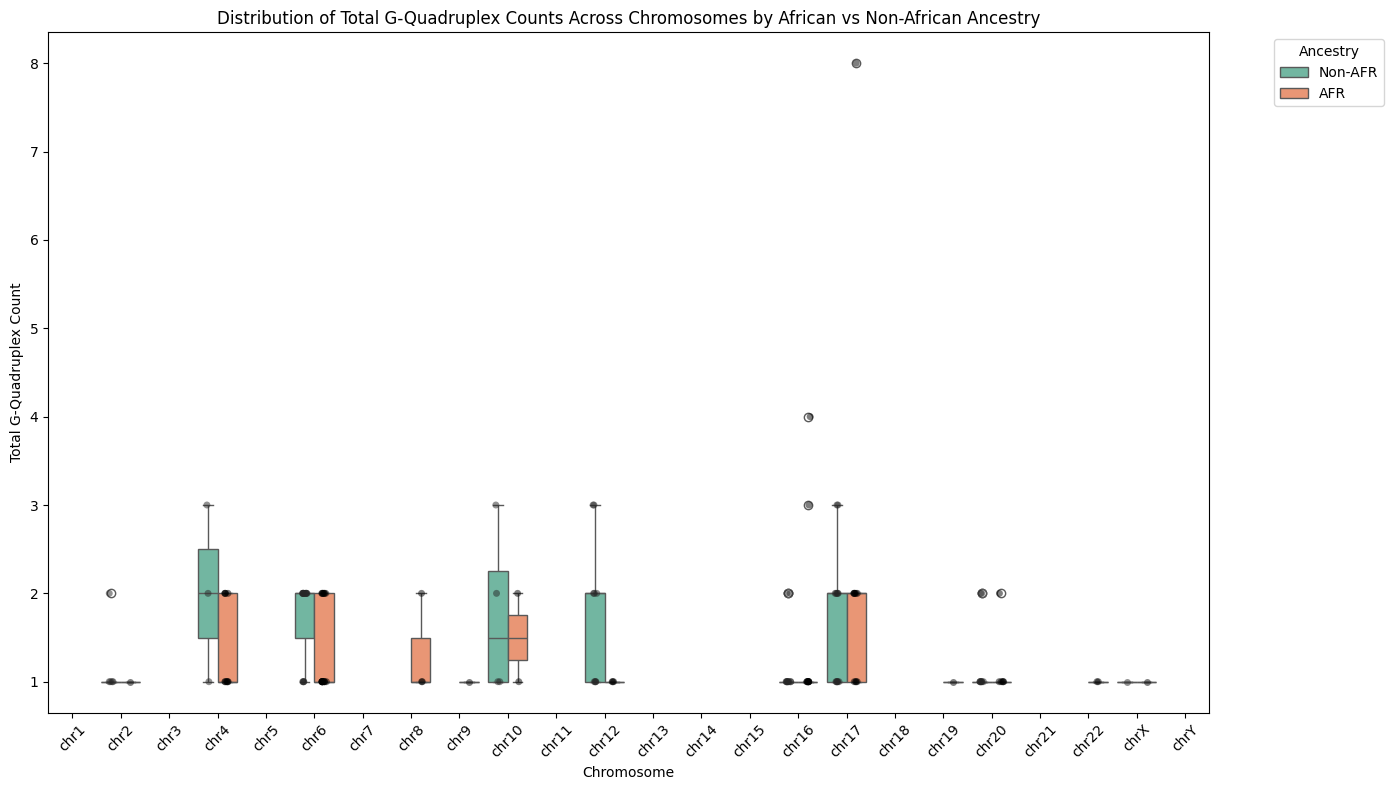

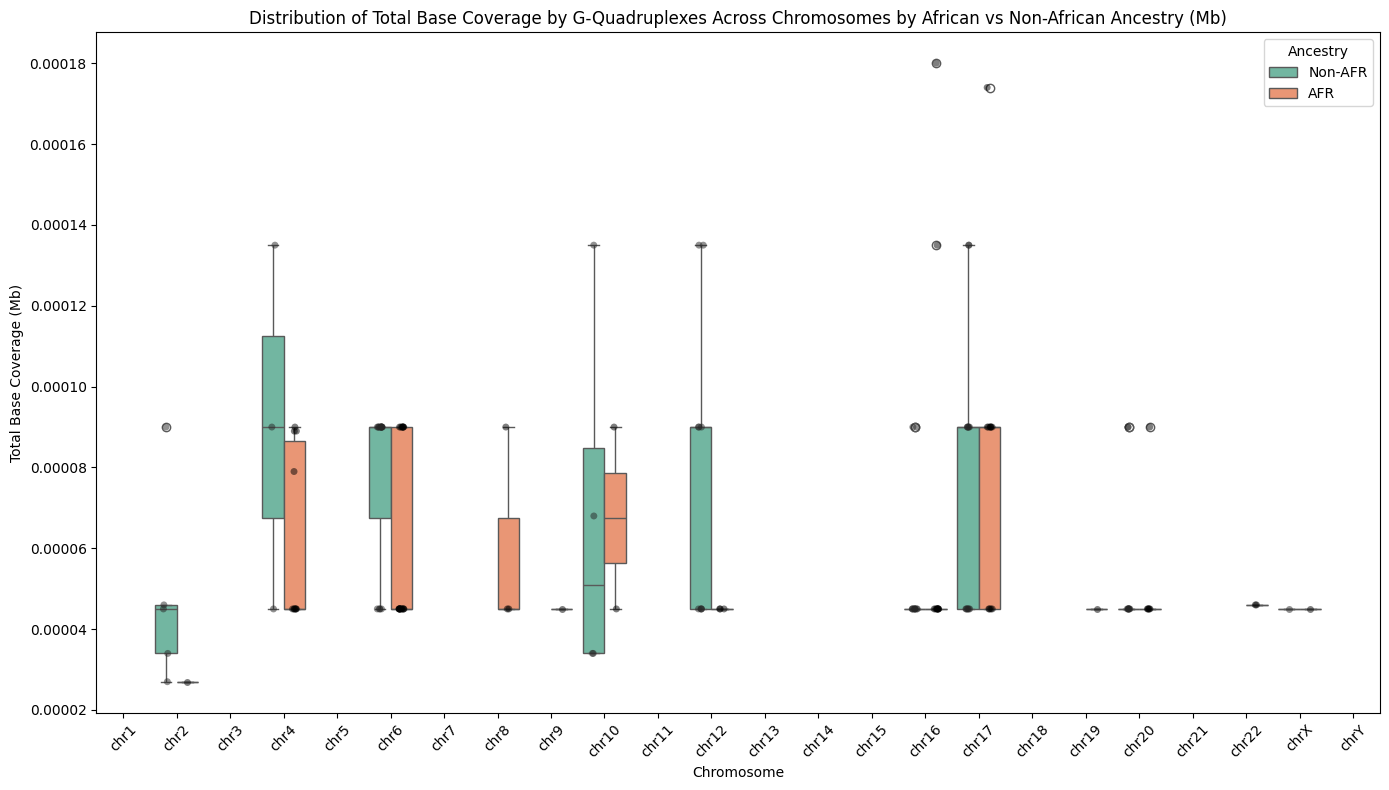

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/'
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'  # Update this with the actual path to your metadata file
chromosome_files = sorted(glob.glob(base_path + 'verkko123_quadron_collapsed_summary_metrics_centromeres_chr*.csv'))

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Standardize the case and strip whitespace in the metadata's Sample name
metadata_df['Sample name'] = metadata_df['Sample name'].str.upper().str.strip()

# Load data from Quadron files and extract chromosome information from the file names
quadron_data = []
for file in chromosome_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    df['Sample'] = df['Sample_Haplotype'].str.extract(r'(HG\d{5}|NA\d{5})')[0].str.upper().str.strip()
    quadron_data.append(df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Count', 'Total Base Coverage', 'Chromosome']])

# Concatenate data into a single DataFrame
quadron_df = pd.concat(quadron_data, ignore_index=True)

# Check the number of unique samples before merging with metadata
print(f"Number of unique samples before merging: {quadron_df['Sample_Haplotype'].nunique()}")

# Filter for G-Quadruplexes only and combine positive and negative counts and coverage
g_quad_df = quadron_df[quadron_df['Motif Type'].isin(['Positive_G_Quad', 'Negative_G_Quad'])]
g_quad_df = g_quad_df.groupby(['Sample_Haplotype', 'Sample', 'Chromosome']).agg({
    'Total Count': 'sum',
    'Total Base Coverage': 'sum'
}).reset_index()

# Convert Total Base Coverage from base pairs to megabases (Mb)
g_quad_df['Total Base Coverage'] = g_quad_df['Total Base Coverage'] / 1e6

# Merge metadata with the data
merged_data = pd.merge(g_quad_df, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Identify samples that were not matched
unmatched_samples = merged_data[merged_data['Superpopulation name'].isnull()]
if not unmatched_samples.empty:
    print("Warning: The following samples were not matched with metadata:")
    print(unmatched_samples['Sample'].unique())

# Check the number of unique samples after merging
print(f"Number of unique samples after merging: {merged_data['Sample_Haplotype'].nunique()}")

# Categorize into African Ancestry vs Non-African Ancestry
merged_data['Ancestry'] = merged_data['Superpopulation name'].apply(lambda x: 'AFR' if x == 'African Ancestry' else 'Non-AFR')

# Sum the total counts and base coverage for each haplotype, chromosome, and ancestry
summed_data = merged_data.groupby(['Sample_Haplotype', 'Ancestry', 'Chromosome']).agg({
    'Total Count': 'sum',
    'Total Base Coverage': 'sum'
}).reset_index()

# Check the number of unique samples after summing data
print(f"Number of unique samples after summing data: {summed_data['Sample_Haplotype'].nunique()}")

# Convert the order of chromosomes to categorical for proper ordering
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
summed_data['Chromosome'] = pd.Categorical(summed_data['Chromosome'], categories=chromosome_order, ordered=True)

# Print the number of samples assigned to each bar and the number of points assigned to each box
print("Number of samples assigned to each bar:")
for chrom in chromosome_order:
    for ancestry in ['AFR', 'Non-AFR']:
        sub_df = summed_data[(summed_data['Chromosome'] == chrom) & (summed_data['Ancestry'] == ancestry)]
        count = sub_df['Sample_Haplotype'].nunique()
        if count > 0:
            print(f"Chromosome: {chrom}, Ancestry: {ancestry}, Count: {count} samples")

# Plotting the distributions for African Ancestry vs Non-African Ancestry for Total Count
plt.figure(figsize=(14, 8))
sns.boxplot(x='Chromosome', y='Total Count', hue='Ancestry', data=summed_data, palette='Set2', dodge=True)
sns.stripplot(x='Chromosome', y='Total Count', hue='Ancestry', data=summed_data, palette='dark:black', jitter=True, alpha=0.5, dodge=True, legend=False)

# Remove duplicate entries in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Ancestry', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Total G-Quadruplex Counts Across Chromosomes by African vs Non-African Ancestry')
plt.xlabel('Chromosome')
plt.ylabel('Total G-Quadruplex Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the distributions for African Ancestry vs Non-African Ancestry for Total Base Coverage in Mb
plt.figure(figsize=(14, 8))
sns.boxplot(x='Chromosome', y='Total Base Coverage', hue='Ancestry', data=summed_data, palette='Set2', dodge=True)
sns.stripplot(x='Chromosome', y='Total Base Coverage', hue='Ancestry', data=summed_data, palette='dark:black', jitter=True, alpha=0.5, dodge=True, legend=False)

plt.title('Distribution of Total Base Coverage by G-Quadruplexes Across Chromosomes by African vs Non-African Ancestry (Mb)')
plt.xlabel('Chromosome')
plt.ylabel('Total Base Coverage (Mb)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Outliers with Percent Centromere Covered > 100%:
Empty DataFrame
Columns: [Sample_Haplotype_Chromosome, Motif Type, Total Count, Total Bases Covered, Chromosome, Sample, Haplotype, Centromere_Length, Percent_Centromere_Covered]
Index: []
                            Sample_Haplotype_Chromosome Motif Type  \
1409  NA24385_haplotype1-0000015_chr3|haplotype1-000...         IR   
1410  NA24385_haplotype1-0000015_chr3|haplotype1-000...         IR   
1411  NA24385_haplotype1-0000015_chr3|haplotype1-000...          Z   
1412  NA24385_haplotype1-0000015_chr3|haplotype1-000...          Z   
1413  NA24385_haplotype1-0000015_chr3|haplotype1-000...         MR   
1414  NA24385_haplotype1-0000015_chr3|haplotype1-000...         MR   
1415  NA24385_haplotype1-0000015_chr3|haplotype1-000...         DR   
1425  NA24385_haplotype2-0000080_chr3|haplotype2-000...         IR   
1426  NA24385_haplotype2-0000080_chr3|haplotype2-000...         IR   
1427  NA24385_haplotype2-0000080_chr3|haplotype2-000...       

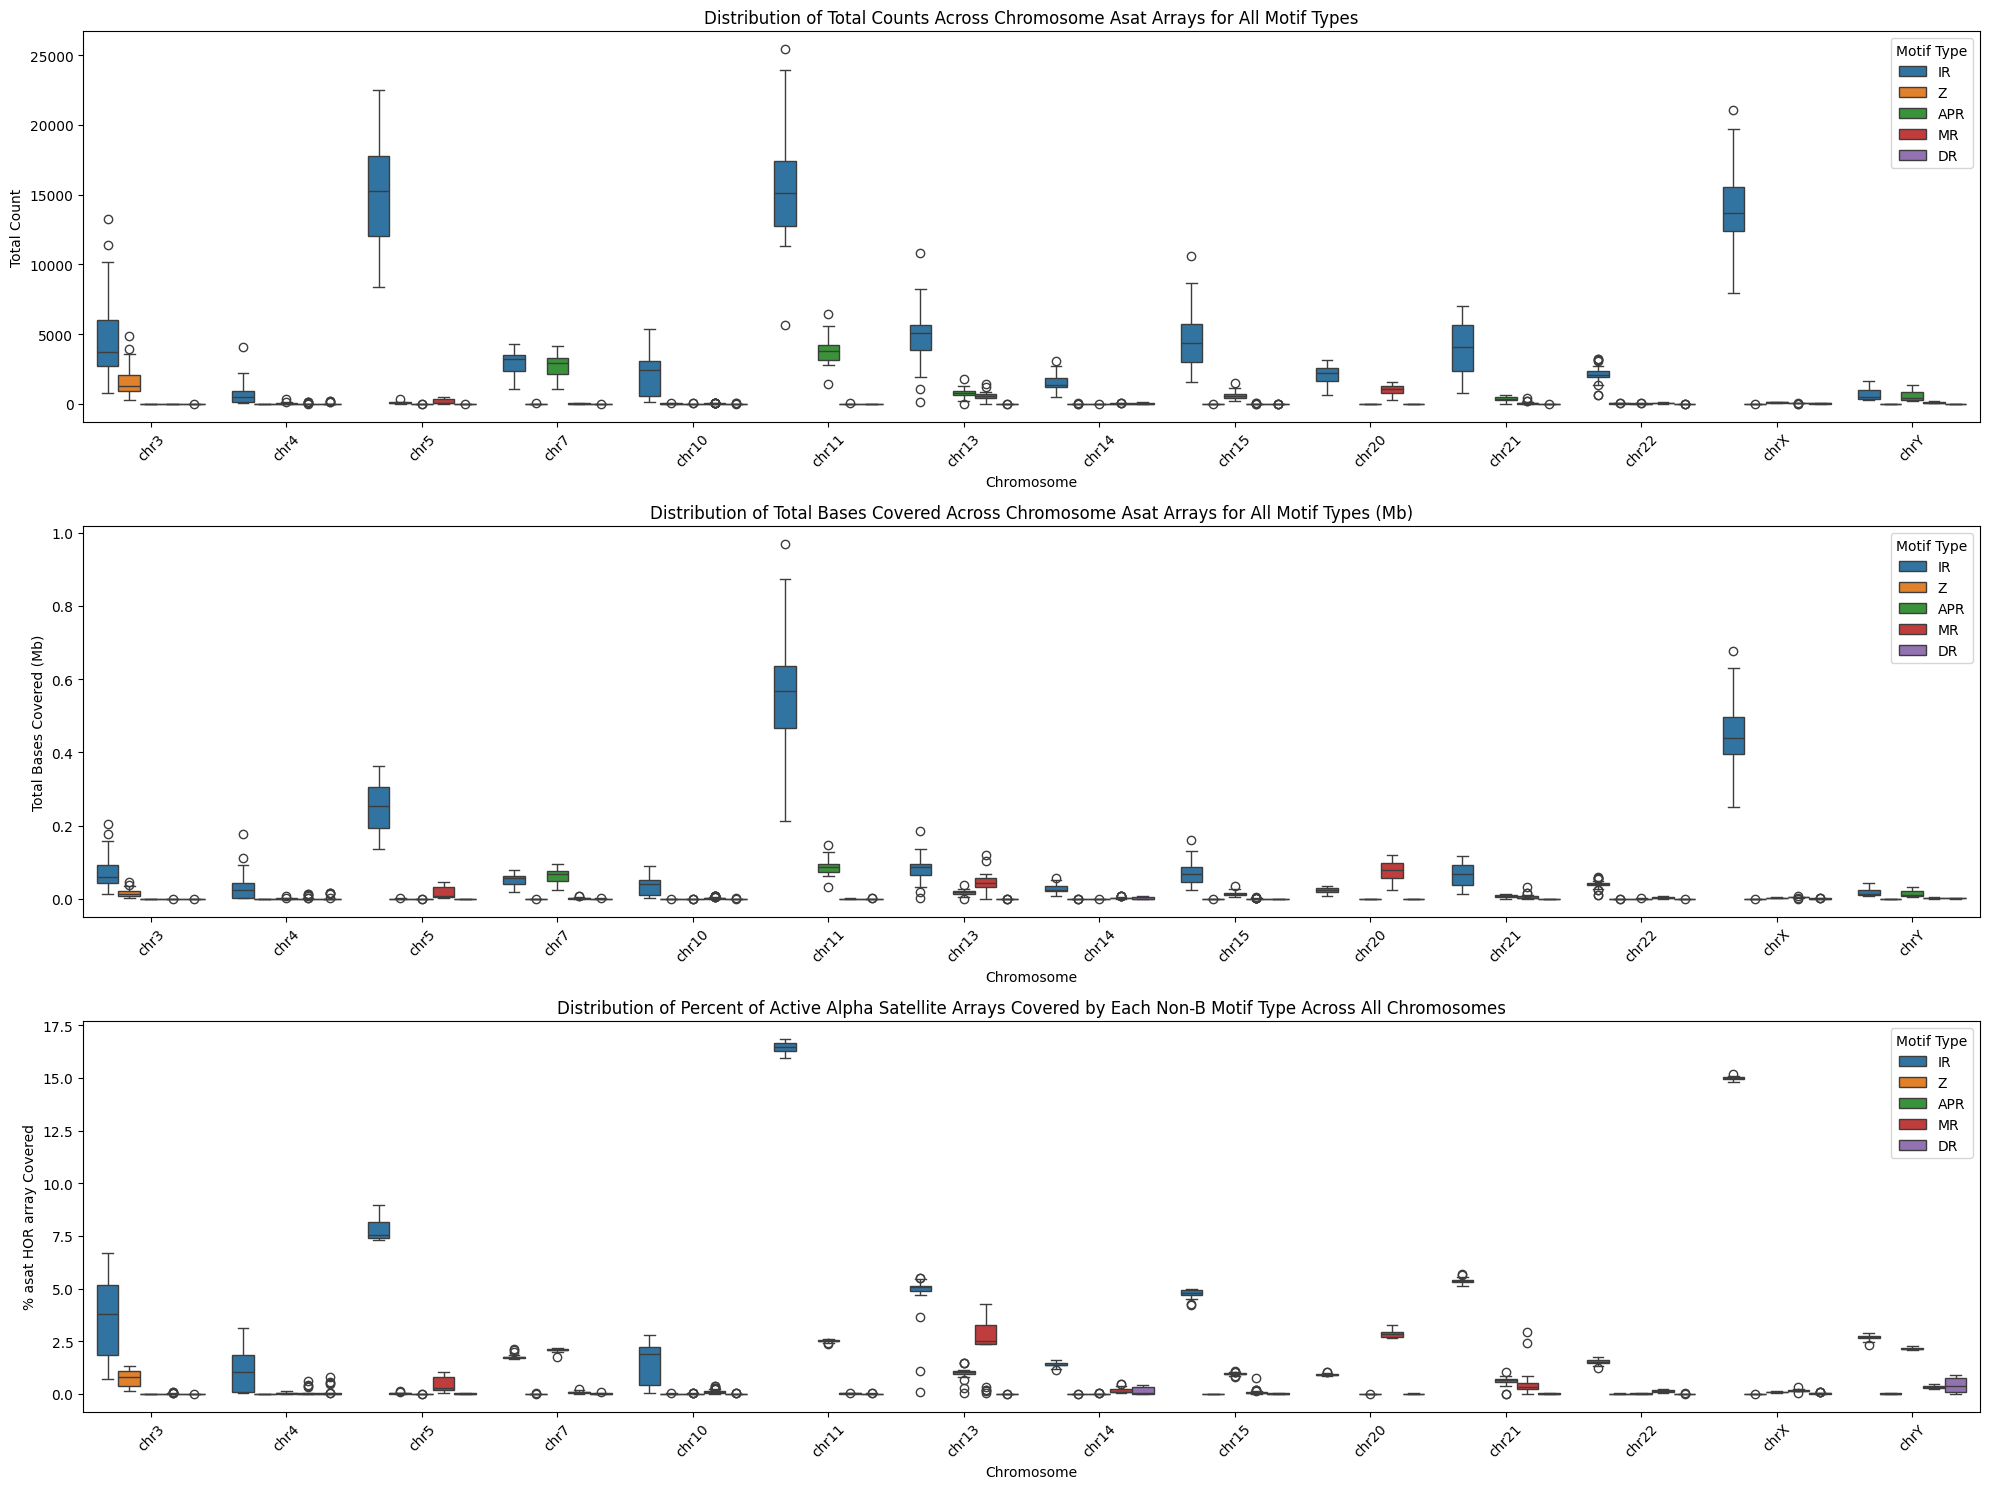

Total number of unique centromeres: 2205


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# File paths for asat arrays (assuming they are stored in the same directory)
nonb_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/verkko123_collapsed_summary_metrics_centromere_chr*.csv'))

# Initialize an empty list to hold data
nonb_data = []

# Load data from non-B motif files and extract chromosome information from the file names
for file in nonb_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    df['Sample'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d{5}|NA\d{5})')[0]  # Extract Sample information from the filename
    df['Haplotype'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(haplotype\d+-\d+)')  # Extract Haplotype information from the filename
    nonb_data.append(df)

# Concatenate all data into a single DataFrame
nonb_df = pd.concat(nonb_data, ignore_index=True)

# Define the specific chromosomes to include
selected_chromosomes = ['chr3', 'chr4', 'chr5', 'chr7', 'chr10', 'chr11', 'chr13', 'chr14', 'chr15', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY']

# Filter for only the selected chromosomes
nonb_df = nonb_df[nonb_df['Chromosome'].isin(selected_chromosomes)]

# Define the order of the selected chromosomes
chromosome_order = selected_chromosomes

# Convert Chromosome column to a categorical type with a specific order
nonb_df['Chromosome'] = pd.Categorical(nonb_df['Chromosome'], categories=chromosome_order, ordered=True)

# Convert Total Bases Covered from bp to Mb
nonb_df['Total Bases Covered'] = nonb_df['Total Bases Covered'] / 1e6

# Load the collapsed asat arrays data
collapsed_asat_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/collapsed_asat_arrays.csv'
collapsed_asat_df = pd.read_csv(collapsed_asat_path)

# Merge the collapsed asat arrays data into the non-B motif data
nonb_df = pd.merge(
    nonb_df, 
    collapsed_asat_df[['Haplotype', 'Sample', 'Chromosome', 'Centromere_Length']], 
    on=['Haplotype', 'Sample', 'Chromosome'], 
    how='left'
)

# Calculate the percentage of centromere covered
nonb_df['Percent_Centromere_Covered'] = (nonb_df['Total Bases Covered'] / nonb_df['Centromere_Length']) * 100

# Identify rows where Percent_Centromere_Covered is greater than 100%
outliers = nonb_df[nonb_df['Percent_Centromere_Covered'] > 100]

# Display the outliers
print("Outliers with Percent Centromere Covered > 100%:")
print(outliers)

# Create a combined plot for all motif types and all chromosomes
plt.figure(figsize=(20, 15))  # Adjust figure size to fit 3 plots

test_sample = nonb_df[(nonb_df['Sample'] == "NA24385") & (nonb_df['Chromosome'] == "chr3")]
print(test_sample)

# Total Count plot
plt.subplot(3, 1, 1)
sns.boxplot(data=nonb_df, x='Chromosome', y='Total Count', hue='Motif Type', order=chromosome_order)
plt.title('Distribution of Total Counts Across Chromosome Asat Arrays for All Motif Types')
plt.xlabel('Chromosome')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right', title='Motif Type')

# Total Bases Covered plot
plt.subplot(3, 1, 2)
sns.boxplot(data=nonb_df, x='Chromosome', y='Total Bases Covered', hue='Motif Type', order=chromosome_order, showfliers=True)
plt.title('Distribution of Total Bases Covered Across Chromosome Asat Arrays for All Motif Types (Mb)')
plt.xlabel('Chromosome')
plt.ylabel('Total Bases Covered (Mb)')
plt.xticks(rotation=45)

# Percentage Centromere Covered plot
plt.subplot(3, 1, 3)
sns.boxplot(data=nonb_df, x='Chromosome', y='Percent_Centromere_Covered', hue='Motif Type', order=chromosome_order, showfliers=True)
plt.title('Distribution of Percent of Active Alpha Satellite Arrays Covered by Each Non-B Motif Type Across All Chromosomes')
plt.xlabel('Chromosome')
plt.ylabel('% asat HOR array Covered')
plt.xticks(rotation=45)

# Save the figure as a PDF
plt.tight_layout()
plt.savefig('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/imgs/verkko123_asat_arrays.pdf', bbox_inches='tight')

plt.show()

# Calculate and print the total number of centromeres
total_centromeres = nonb_df.shape[0]
print(f"Total number of unique centromeres: {total_centromeres}")

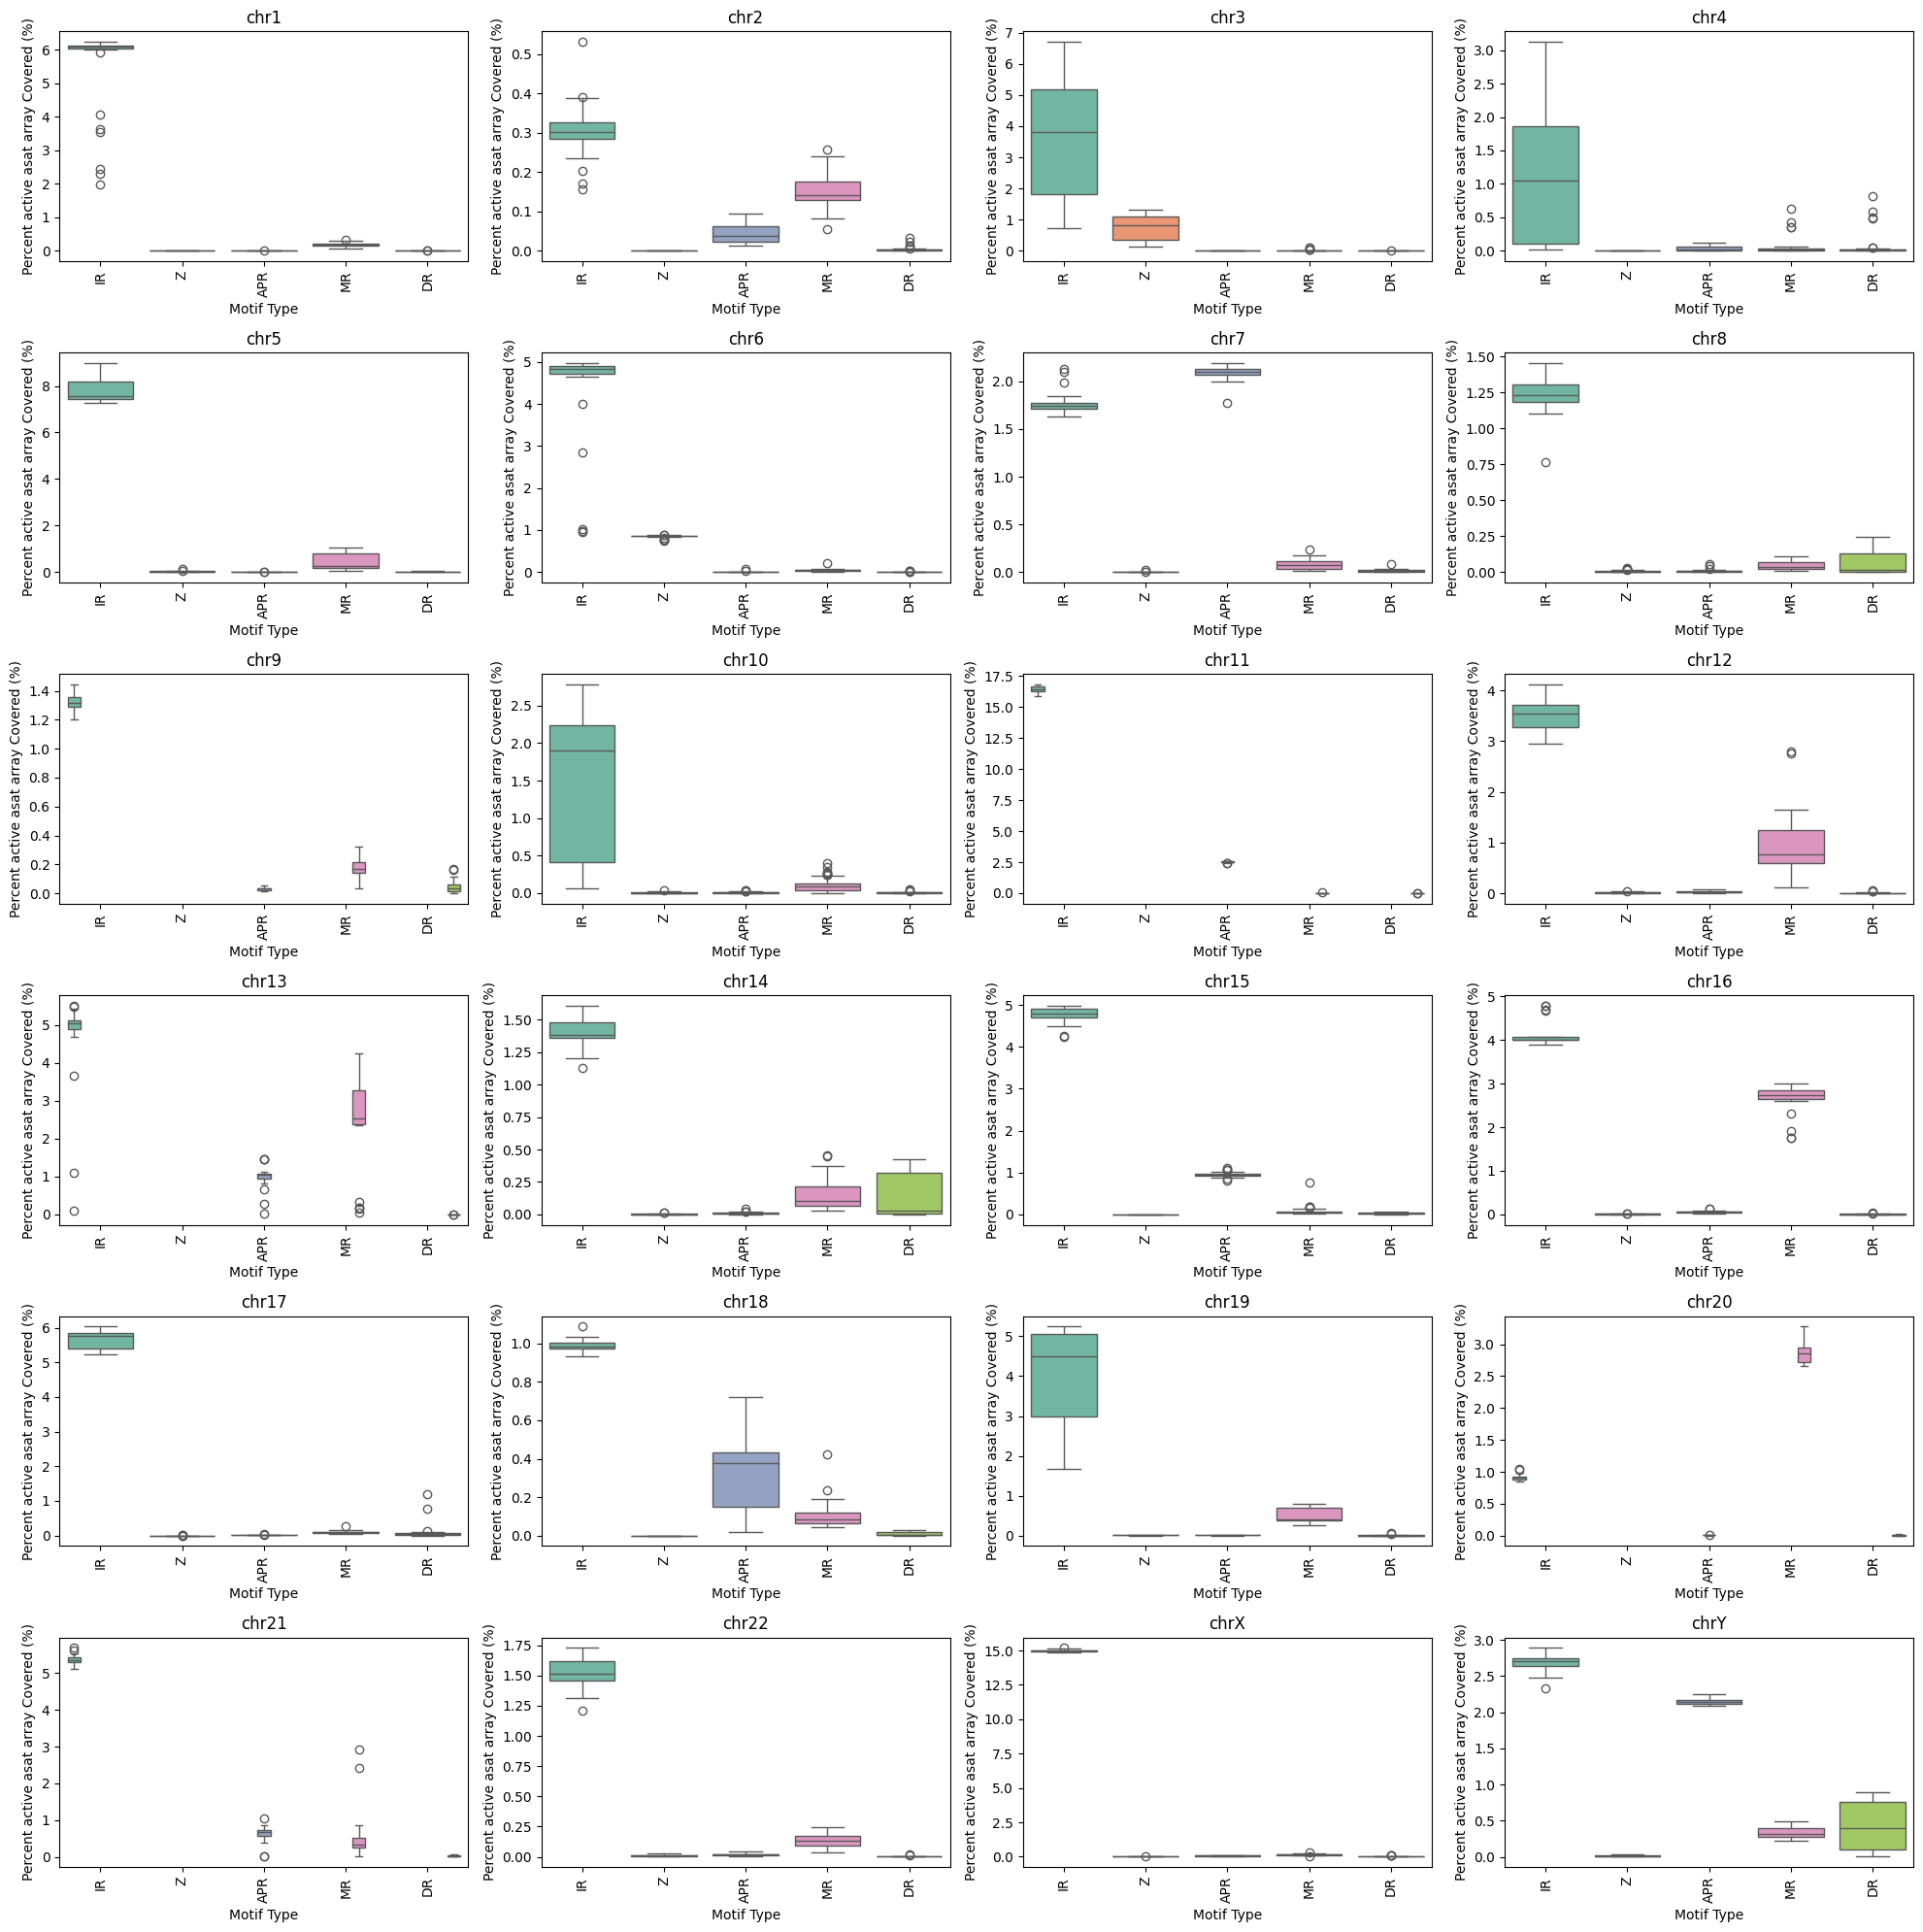

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# File paths for asat arrays (assuming they are stored in the same directory)
nonb_files = sorted(glob.glob('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/verkko123_collapsed_summary_metrics_centromere_chr*.csv'))

# Initialize an empty list to hold data
nonb_data = []

# Load data from non-B motif files and extract chromosome information from the file names
for file in nonb_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    df['Sample'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d{5}|NA\d{5})')[0]  # Extract Sample information from the filename
    df['Haplotype'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(haplotype\d+-\d+)')[0]  # Extract Haplotype information
    nonb_data.append(df)

# Concatenate all data into a single DataFrame
nonb_df = pd.concat(nonb_data, ignore_index=True)

# Define the order of chromosomes
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
nonb_df['Chromosome'] = pd.Categorical(nonb_df['Chromosome'], categories=chromosome_order, ordered=True)

# Define the order of Motif Types (IR, Z, APR, MR, DR)
motif_order = ['IR', 'Z', 'APR', 'MR', 'DR']
nonb_df['Motif Type'] = pd.Categorical(nonb_df['Motif Type'], categories=motif_order, ordered=True)

# Load the collapsed asat array lengths
collapsed_asat_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/collapsed_asat_arrays.csv'
collapsed_asat_df = pd.read_csv(collapsed_asat_path)

# Merge the collapsed asat lengths into the non-B motif data based on Haplotype, Sample, and Chromosome
nonb_df = pd.merge(nonb_df, collapsed_asat_df[['Haplotype', 'Sample', 'Chromosome', 'Centromere_Length']], 
                   on=['Haplotype', 'Sample', 'Chromosome'], how='left')

# Calculate the percentage of centromere covered using the collapsed centromere lengths
nonb_df['Percent_Centromere_Covered'] = ((nonb_df['Total Bases Covered']/1e6) / nonb_df['Centromere_Length']) * 100

# Define a consistent color palette for all motif types (IR, Z, APR, MR, DR)
motif_palette = sns.color_palette("Set2", len(motif_order))
motif_palette = dict(zip(motif_order, motif_palette))

# Plot for each chromosome separately with percent coverage
plt.figure(figsize=(20, 20))  # Create a large figure for the grid of plots

# Set the number of rows and columns for the grid (6 rows, 4 columns)
n_rows = 6
n_cols = 4

for i, chrom in enumerate(chromosome_order):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each chromosome
    
    chrom_df = nonb_df[nonb_df['Chromosome'] == chrom]
    
    # Boxplot with hue for different motif types using Percent Centromere Covered
    sns.boxplot(data=chrom_df, x='Motif Type', y='Percent_Centromere_Covered', hue='Motif Type', palette=motif_palette, order=motif_order)

    plt.title(f'{chrom}')
    plt.xticks(rotation=90)
    plt.xlabel('Motif Type')
    plt.ylabel('Percent active asat array Covered (%)')
    
    # Remove the duplicate legend from the stripplot
    plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

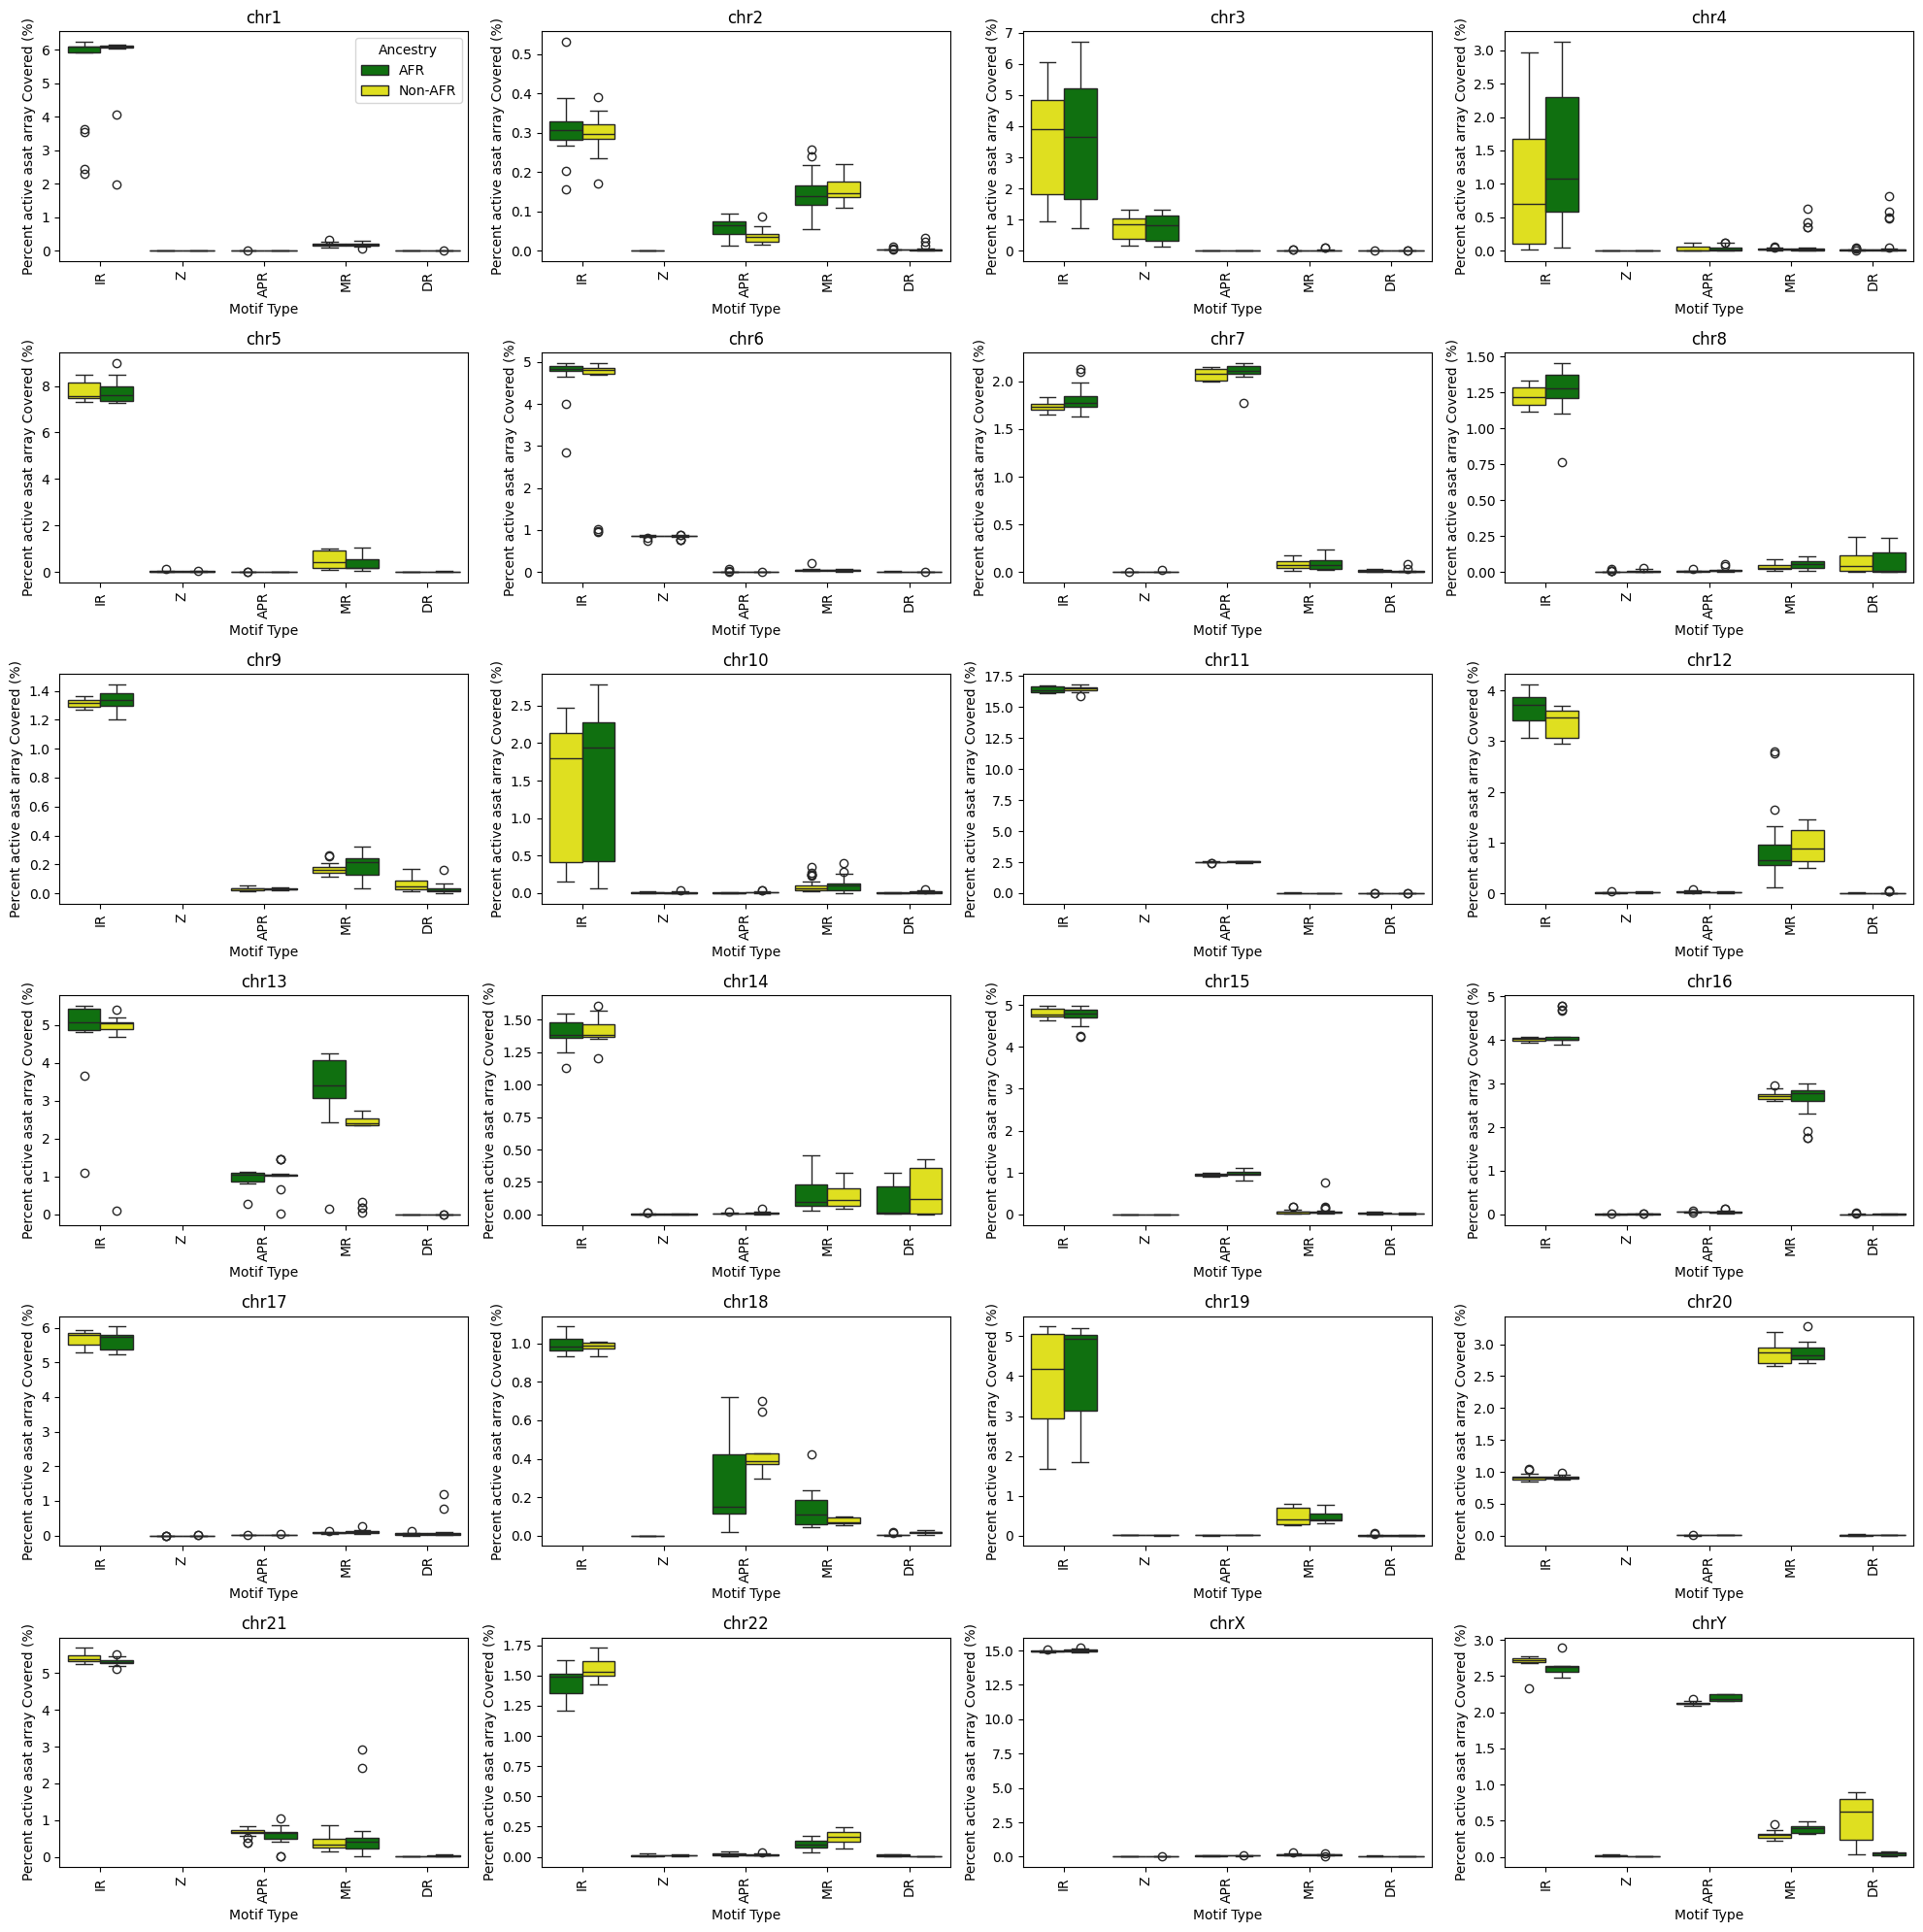

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# File paths for asat arrays
nonb_files = sorted(glob.glob(
    '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/verkko123_collapsed_summary_metrics_centromere_chr*.csv'
))

# Initialize an empty list to hold data
nonb_data = []

# Load data from non-B motif files and extract chromosome information from the file names
for file in nonb_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome
    df['Sample'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d{5}|NA\d{5})')[0]  # Extract Sample information from the filename
    df['Haplotype'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(haplotype\d+-\d+)')[0]  # Extract Haplotype information
    nonb_data.append(df)

# Concatenate all data into a single DataFrame
nonb_df = pd.concat(nonb_data, ignore_index=True)

# Define the order of chromosomes and Motif Types
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
nonb_df['Chromosome'] = pd.Categorical(nonb_df['Chromosome'], categories=chromosome_order, ordered=True)

motif_order = ['IR', 'Z', 'APR', 'MR', 'DR']
nonb_df['Motif Type'] = pd.Categorical(nonb_df['Motif Type'], categories=motif_order, ordered=True)

# Load the collapsed asat array lengths
collapsed_asat_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/collapsed_asat_arrays.csv'
collapsed_asat_df = pd.read_csv(collapsed_asat_path)

# Merge the collapsed asat lengths into the non-B motif data based on Haplotype, Sample, and Chromosome
nonb_df = pd.merge(
    nonb_df, 
    collapsed_asat_df[['Haplotype', 'Sample', 'Chromosome', 'Centromere_Length']], 
    on=['Haplotype', 'Sample', 'Chromosome'], 
    how='left'
)

# Load metadata to separate by ancestry
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'
metadata_df = pd.read_csv(metadata_path, delimiter='\t')
metadata_df['Sample name'] = metadata_df['Sample name'].str.upper().str.strip()

# Merge metadata with the non-B motif data
nonb_df = pd.merge(
    nonb_df, 
    metadata_df[['Sample name', 'Superpopulation name']], 
    left_on='Sample', 
    right_on='Sample name', 
    how='left'
)

# Categorize into African vs Non-African
nonb_df['Ancestry'] = nonb_df['Superpopulation name'].apply(lambda x: 'AFR' if x == 'African Ancestry' else 'Non-AFR')

# Calculate the percentage of centromere covered using the collapsed centromere lengths
nonb_df['Percent_Centromere_Covered'] = ((nonb_df['Total Bases Covered'] / 1e6) / nonb_df['Centromere_Length']) * 100

# Define a consistent color palette for motif types and ancestry
motif_palette = sns.color_palette("Set2", len(motif_order))
motif_palette = dict(zip(motif_order, motif_palette))
ancestry_palette = {'AFR': 'green', 'Non-AFR': 'yellow'}

# Plot for each chromosome separately with ancestry breakdown
plt.figure(figsize=(20, 20))  # Create a large figure for the grid of plots

# Set the number of rows and columns for the grid (6 rows, 4 columns)
n_rows = 6
n_cols = 4

for i, chrom in enumerate(chromosome_order):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each chromosome
    
    chrom_df = nonb_df[nonb_df['Chromosome'] == chrom]
    
    # Boxplot for percent centromere covered, separating by Ancestry
    sns.boxplot(
        data=chrom_df, 
        x='Motif Type', 
        y='Percent_Centromere_Covered', 
        hue='Ancestry', 
        palette=ancestry_palette, 
        order=motif_order
    )

    plt.title(f'{chrom}')
    plt.xticks(rotation=90)
    plt.xlabel('Motif Type')
    plt.ylabel('Percent active asat array Covered (%)')
    
    # Handle legend
    if i == 0:
        plt.legend(title='Ancestry')
    else:
        plt.legend([], [], frameon=False)

plt.tight_layout()
plt.savefig('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/imgs/verkko123_asat_individual_afrvsnonafr.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/'

# Load all motif BED summaries
nonb_files = sorted(glob.glob(base_path + 'verkko123_collapsed_summary_metrics_centromere_chr*.csv'))
nonb_data = []

for file in nonb_files:
    df = pd.read_csv(file)
    chromosome = os.path.basename(file).split('_')[-1].replace('.csv', '')
    df['Chromosome'] = chromosome

    # Extract Sample (HG#### or NA####)
    df['Sample'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d{5}|NA\d{5})')[0]
    
    nonb_data.append(df)

# Combine into one DataFrame
nonb_df = pd.concat(nonb_data, ignore_index=True)

# Load HOR array lengths
asat_bed_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/haplotype_summarystats_verkko123_active_asat_HOR_arrays/hgsvc3_verkko_v1.4_nonredundant_complete_and_accurate_active_asat_HOR_arrays_v3.bed'
asat_columns = ['Haplotype', 'Start', 'End', 'Sample', 'Chromosome']
asat_df = pd.read_csv(asat_bed_path, sep='\t', header=None, names=asat_columns)
asat_df['HOR_Length'] = asat_df['End'] - asat_df['Start']

# Merge HOR array length
nonb_df = pd.merge(nonb_df, asat_df[['Sample', 'Chromosome', 'HOR_Length']], on=['Sample', 'Chromosome'], how='left')

# Group by sample and motif type
grouped_df = nonb_df.groupby(['Sample', 'Motif Type'], observed=False).agg({
    'Total Bases Covered': 'sum',
    'HOR_Length': 'sum'
}).reset_index()

# Calculate percent coverage of active asat arrays
grouped_df['Percent_HOR_Covered'] = (grouped_df['Total Bases Covered'] / grouped_df['HOR_Length']) * 100

# Sort motif types by median
motif_order = grouped_df.groupby("Motif Type")["Percent_HOR_Covered"].median().sort_values().index.tolist()

# Plot
plt.figure(figsize=(6, 9))
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=grouped_df,
    x='Motif Type',
    y='Percent_HOR_Covered',
    order=motif_order,
    palette=sns.color_palette("Set2", n_colors=len(motif_order))
)

sns.stripplot(
    data=grouped_df,
    x='Motif Type',
    y='Percent_HOR_Covered',
    order=motif_order,
    color='black',
    size=2.5,
    alpha=0.5,
    jitter=True
)

plt.title("Coverage of Active Alpha Satellite Arrays by Non-B Motif Type")
plt.ylabel("Total % HOR Array Covered")
plt.xlabel("Motif Type")
plt.xticks(rotation=30)
ax.grid(False)
plt.tight_layout()
plt.savefig('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/imgs/verkko123_asat_arrays_boxplot_by_motif_PER_SAMPLE_sorted_median.pdf')
plt.show()
